<a href="https://colab.research.google.com/github/Tanvi-Sharmaa/face-emoji-detection/blob/main/Dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from imutils import face_utils
import dlib
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist

In [ ]:
p = "models/landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [ ]:
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

def mouth_aspect_ratio(mouth):
    A = dist.euclidean(mouth[0], mouth[6])
    mar = (1.0)/(4.0*A)
    return mar

In [ ]:
cap = cv2.VideoCapture(0)
blinkCount = 0
blinkCountTemp = 0
ear_list=[]
mar_list=[]

while True:
    # Getting out image by webcam 
    _, image = cap.read()
    # Converting the image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # Get faces into webcam's image
    rects = detector(gray, 0)
    
    bg = cv2.imread("background.png")
    # For each detected face, find the landmark.
    for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
        (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
        
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        #find eye aspect ratio
        ear = (leftEAR + rightEAR) / 2.0
        if ear < 0.25:
            blinkCountTemp+=1
        else:
            if blinkCountTemp>0:
                blinkCount+=1
            blinkCountTemp = 0
        
        cv2.putText(bg, "Blinks: {}".format(blinkCount), (470, 290),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        ear_list.append(ear)
        
        ellipseLen=25
        if ear < 0.22:
            ellipseLen=7
        
        # Draw on our image, all the finded cordinate points (x,y) 
        cv2.circle(bg, (shape[33][0], shape[33][1]-15), shape[33][0]-shape[4][0]+30, (0, 255, 255), -1)
        cv2.ellipse(bg, (shape[46][0]-7, shape[46][1]), (7, ellipseLen), 0, 0, 360, (0, 0, 0), -1)
        cv2.ellipse(bg, (shape[40][0]-3, shape[40][1]), (7, ellipseLen), 0, 0, 360, (0, 0, 0), -1)
        
        (mStart, mEnd) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]
        mShape = shape[mStart:mEnd]
        mouth = cv2.convexHull(mShape)
        cv2.drawContours(bg, [mouth], -1, (0, 0, 0), 3)
        
        mar = mouth_aspect_ratio(shape[48:60])
        
        if mar<0.0030:
            cv2.putText(bg, "Keep Smiling!", (470, 360),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        else:
            cv2.putText(bg, "Please Smile", (470, 360),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        mar_list.append(mar)
    
    cv2.putText(bg, "ear : {}".format(ear), (470, 460),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(bg, "mar : {}".format(mar), (470, 560),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
    # Show the image
    cv2.imshow("Output", bg)
    cv2.imshow("Input", image)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

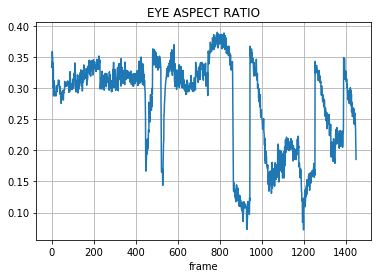

In [ ]:
plt.title("EYE ASPECT RATIO")
plt.plot(ear_list)
plt.xlabel("frame")
plt.grid()
plt.show()

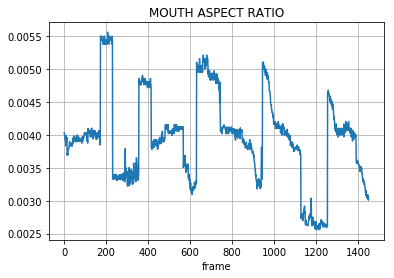

In [ ]:
plt.title("MOUTH ASPECT RATIO")
plt.plot(mar_list)
plt.xlabel("frame")
plt.grid()
plt.show()

In [ ]:
camera1 = cv2.VideoCapture(0)
camera2 = cv2.VideoCapture(1)
ret1, img1 = camera1.read()
ret2, img2 = camera2.read()
if ret1==False or ret2==False:
      print("could not read from cameras !")

cv2.imshow("I", img1)

could not read from cameras !
